In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
import sys
sys.path.append('/home/elena/astrocosmolib/')

from pyACC.fits_wrapper import FitsManager

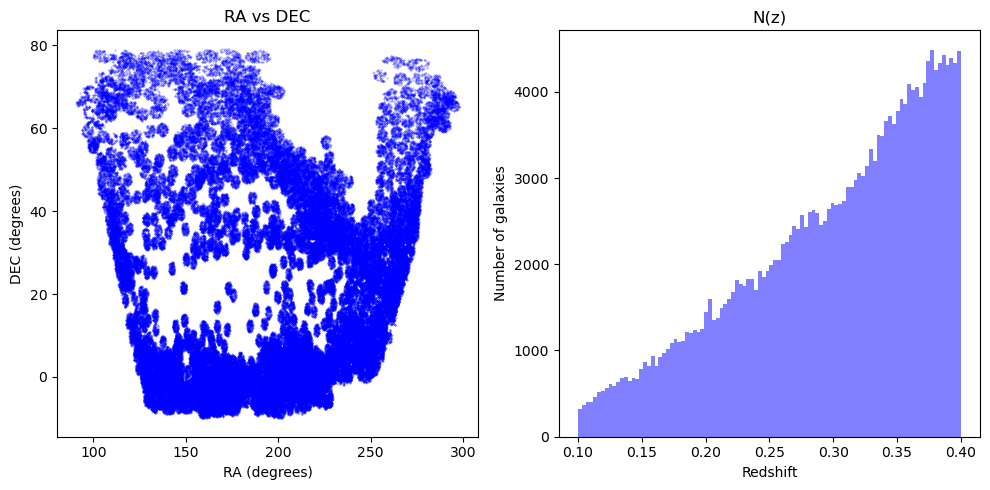

In [2]:
input_file = '/home/elena/astrocosmolib/Lessons/Clustering/BGS_BRIGHT-21.5_NGC_clustering.dat.fits'

desi_catalogue = FitsManager(input_file)
desi_catalogue.get_hdu_count()
data = desi_catalogue.get_data(1)
desi_catalogue.get_header(1)

ra, dec, redshift, weight = data['RA'], data['DEC'], data['Z'], data['WEIGHT']

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(ra, dec, s=0.1, c='blue', alpha=0.5)
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.title('RA vs DEC')
plt.subplot(122)
plt.hist(redshift, bins=100, color='blue', alpha=0.5)
plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')
plt.title('N(z)')
plt.tight_layout()
plt.show()

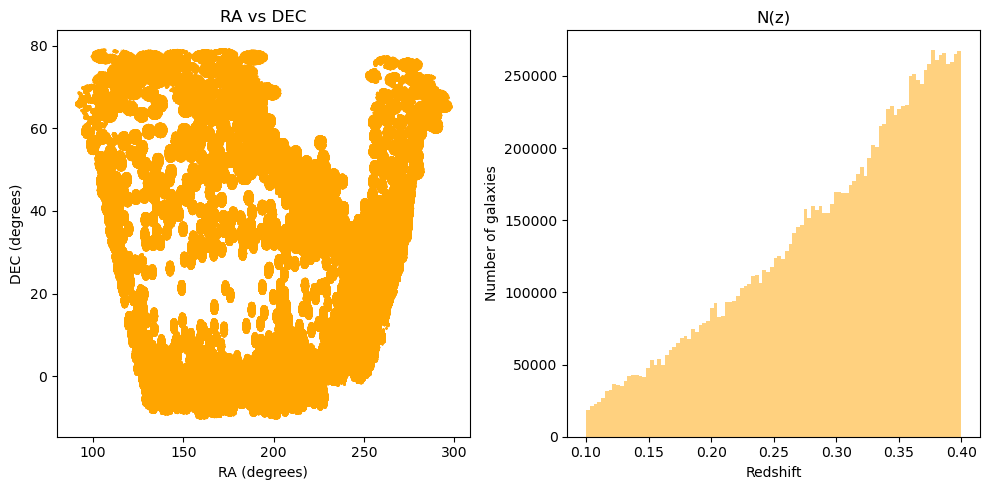

In [3]:
random_file = '/home/elena/astrocosmolib/Lessons/Clustering/BGS_BRIGHT-21.5_NGC_0_clustering.ran.fits'

random_catalogue = FitsManager(random_file)
random_catalogue.get_hdu_count()
random_data = random_catalogue.get_data(1)
random_catalogue.get_header(1)

random_ra, random_dec, random_redshift, random_weight = random_data['RA'], random_data['DEC'], random_data['Z'], random_data['WEIGHT']

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(random_ra, random_dec, s=0.1, c='orange', alpha=0.5)
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.title('RA vs DEC')
plt.subplot(122)
plt.hist(random_redshift, bins=100, color='orange', alpha=0.5)
plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')
plt.title('N(z)')
plt.tight_layout()
plt.show()

In [4]:
from astropy.cosmology import FlatLambdaCDM

def equatorial_to_comoving(ra, dec, z, Om0):
    cosmo = FlatLambdaCDM(H0=100, Om0=0.3)
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)
    comoving_distance = cosmo.comoving_distance(z).value
    x = comoving_distance * np.cos(dec_rad) * np.cos(ra_rad)
    y = comoving_distance * np.cos(dec_rad) * np.sin(ra_rad)
    z = comoving_distance * np.sin(dec_rad)    
    return x, y, z

omega_matter = 0.3

random_idx = np.random.choice(len(random_ra), size=len(ra), replace=False)
random_ra = random_ra[random_idx]
random_dec = random_dec[random_idx]
random_redshift = random_redshift[random_idx]
random_weight = random_weight[random_idx]

data_x, data_y, data_z = equatorial_to_comoving(ra, dec, redshift, omega_matter)
random_x, random_y, random_z = equatorial_to_comoving(random_ra, random_dec, random_redshift, omega_matter)

In [5]:
import Corrfunc
from Corrfunc.theory.DD import DD

r_min = 0.1
r_max = 150
bin_size = 5

r_edges = np.arange(r_min, r_max + bin_size, bin_size)
r_centers = 0.5 * (r_edges[:-1] + r_edges[1:])

/home/elena/anaconda3/envs/acc-env/lib/python3.12/site-packages/Corrfunc/utils.py:918: UserWarning: One or more input array has non-native endianness!  A copy will be made with the correct endianness.
  warnings.warn("One or more input array has non-native endianness!  A copy will"\


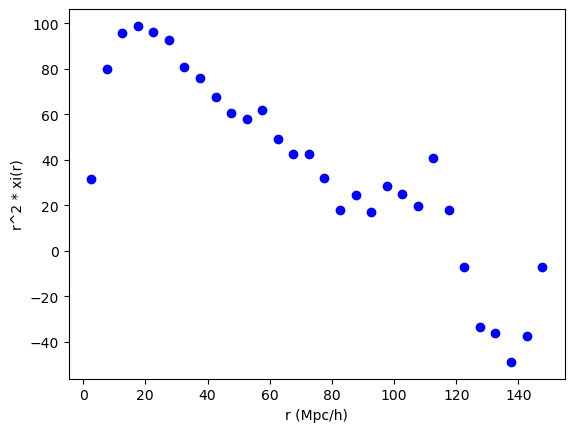

In [6]:
dd = Corrfunc.theory.DD(
    autocorr=True,
    nthreads=4,
    binfile= r_edges,
    X1=data_x,
    Y1=data_y,
    Z1=data_z,
    weights1=weight,
    weight_type='pair_product',
    periodic = False,
    verbose=True,
)

rr = Corrfunc.theory.DD(
    autocorr=True,
    nthreads=4,
    binfile= r_edges,
    X1=random_x,
    Y1=random_y,
    Z1=random_z,
    weights1=random_weight,
    weight_type='pair_product',
    periodic = False,
    verbose=True,
)

dr = Corrfunc.theory.DD(
    autocorr=False,
    nthreads=4,
    binfile= r_edges,
    X1=data_x,
    Y1=data_y,
    Z1=data_z,
    X2=random_x,
    Y2=random_y,
    Z2=random_z,
    weights1=weight,
    weights2=random_weight,
    weight_type='pair_product',
    periodic = False,
    verbose=True,
)

dd_norm = dd["npairs"]*dd["weightavg"]/np.sum(weight)**2
rr_norm = rr["npairs"]*rr["weightavg"]/np.sum(random_weight)**2
dr_norm = dr["npairs"]*dr["weightavg"]/(np.sum(weight)*np.sum(random_weight))

my_xi = (dd_norm - 2*dr_norm + rr_norm)/rr_norm

plt.figure
plt.plot(r_centers, my_xi * r_centers **2, 'o', color='blue', label='Data')
plt.xlabel('r (Mpc/h)')
plt.ylabel('r^2 * xi(r)')
plt.show()

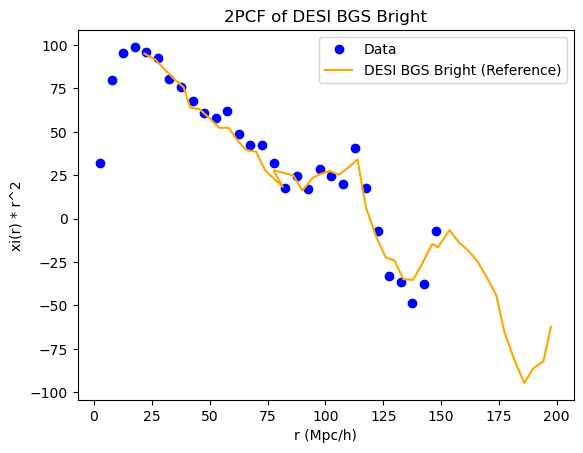

In [7]:
s = [21.724890829694328, 26.310043668122272, 30.021827397908716, 34.17030567685589, 38.75545851528384, 41.59388313126877, 45.52401413563558, 50.327504253803895, 54.03930797327033, 58.18776626253754, 62.117897266904336, 65.82970098637077, 69.97815927563798, 73.90829028000476, 81.55022500383802, 77.62009399947121, 86.13537784226595, 90.06550884663277, 94.65066168506074, 97.92577085536641, 101.85590185973322, 105.78603286410002, 109.93449115336722, 113.86462215773402, 117.57642587720046, 121.94323144104803, 126.09170971999522, 129.80349344978168, 133.73362445414847, 137.88210273309565, 141.5938864628821, 146.17903930131, 148.58077936297417, 153.60262675056288, 157.96943231441045, 161.6812160441969, 165.8296943231441, 170.19649988699163, 173.9083036064581, 177.40174006166413, 181.55021834061134, 185.91702390445892, 189.84715490882573, 194.2139804623533, 197.48908963265893]
s2xi = [95.02074704559621, 91.70124824171745, 86.72198579014236, 80.91287000623299, 75.51866664273379, 63.900416080572484, 63.0705342567243, 57.26141847281497, 52.282165518411176, 52.282165518411176, 44.813286086805476, 39.419082723306275, 38.58921989380073, 27.800832161144967, 18.257257667090144, 27.800832161144967, 24.8962742691903, 16.18258159898366, 23.651461030589346, 25.726137098695844, 27.385900746392196, 25.311205683943072, 29.460576814498694, 34.02489835414971, 6.224075690176065, -10.373446820731672, -22.406628797645766, -24.066392445342117, -34.854761183655256, -35.26971159275065, -26.556018922544013, -14.522817951287294, -16.597513013736418, -6.639007104928822, -14.107886536534522, -18.257257667090144, -24.89625527484766, -34.854761183655256, -44.39833567771007, -65.56016073392621, -80.91285101189037, -94.6057966365008, -86.30705437538955, -82.15766425049131, -62.24065243287613]

plt.plot(r_centers, r_centers**2*my_xi, 'o', color='blue', label='Data')
plt.plot(s, s2xi, label='DESI BGS Bright (Reference)', color='orange')
plt.xlabel('r (Mpc/h)')
plt.ylabel('xi(r) * r^2')
plt.title('2PCF of DESI BGS Bright')
plt.legend()
plt.show()

2PCF CON LIBRERIA pyACC

In [8]:
import sys
sys.path.append('/home/elena/astrocosmolib/')

from pyACC.clustering.measure.two_points import TwoPointIsotropic

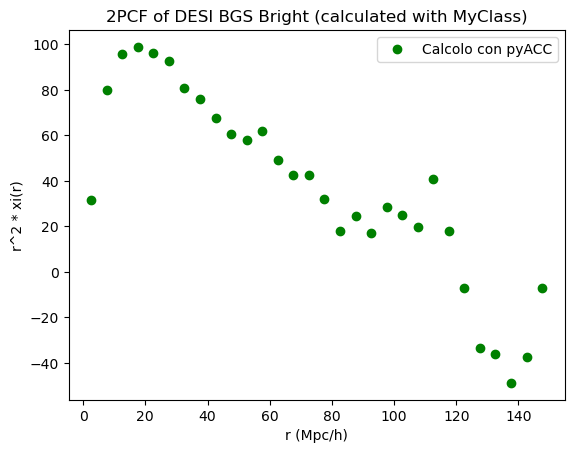

In [9]:
r_min = 0.1
r_max = 150
bin_size = 5

clustering = TwoPointIsotropic()

clustering.compute(
    r_min=r_min,
    r_max=r_max,
    delta_r=bin_size,
    x1coords=data_x,
    y1coords=data_y,
    z1coords=data_z,
    x2coords=random_x,
    y2coords=random_y,
    z2coords=random_z,
    weights1=weight,
    weights2=random_weight,
    periodic=False,
    boxsize=None,
    nthreads=4
)

r_centers_class = clustering.r_centers
xi_class = clustering.xi

plt.figure()
plt.plot(r_centers_class, r_centers_class**2 * xi_class, 'o', color='green', label='Calcolo con pyACC')
plt.xlabel('r (Mpc/h)')
plt.ylabel('r^2 * xi(r)')
plt.title('2PCF of DESI BGS Bright (calculated with MyClass)')
plt.legend()
plt.show()

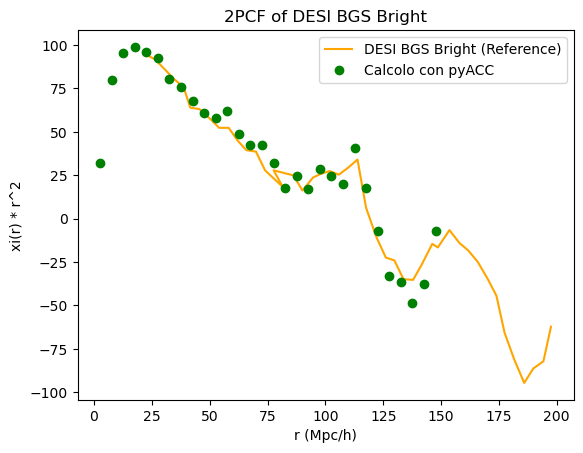

In [10]:
s = [21.724890829694328, 26.310043668122272, 30.021827397908716, 34.17030567685589, 38.75545851528384, 41.59388313126877, 45.52401413563558, 50.327504253803895, 54.03930797327033, 58.18776626253754, 62.117897266904336, 65.82970098637077, 69.97815927563798, 73.90829028000476, 81.55022500383802, 77.62009399947121, 86.13537784226595, 90.06550884663277, 94.65066168506074, 97.92577085536641, 101.85590185973322, 105.78603286410002, 109.93449115336722, 113.86462215773402, 117.57642587720046, 121.94323144104803, 126.09170971999522, 129.80349344978168, 133.73362445414847, 137.88210273309565, 141.5938864628821, 146.17903930131, 148.58077936297417, 153.60262675056288, 157.96943231441045, 161.6812160441969, 165.8296943231441, 170.19649988699163, 173.9083036064581, 177.40174006166413, 181.55021834061134, 185.91702390445892, 189.84715490882573, 194.2139804623533, 197.48908963265893]
s2xi = [95.02074704559621, 91.70124824171745, 86.72198579014236, 80.91287000623299, 75.51866664273379, 63.900416080572484, 63.0705342567243, 57.26141847281497, 52.282165518411176, 52.282165518411176, 44.813286086805476, 39.419082723306275, 38.58921989380073, 27.800832161144967, 18.257257667090144, 27.800832161144967, 24.8962742691903, 16.18258159898366, 23.651461030589346, 25.726137098695844, 27.385900746392196, 25.311205683943072, 29.460576814498694, 34.02489835414971, 6.224075690176065, -10.373446820731672, -22.406628797645766, -24.066392445342117, -34.854761183655256, -35.26971159275065, -26.556018922544013, -14.522817951287294, -16.597513013736418, -6.639007104928822, -14.107886536534522, -18.257257667090144, -24.89625527484766, -34.854761183655256, -44.39833567771007, -65.56016073392621, -80.9128510119037, -94.6057966365008, -86.30705437538955, -82.15766425049131, -62.24065243287613]

plt.figure()
plt.plot(s, s2xi, label='DESI BGS Bright (Reference)', color='orange') 
plt.plot(r_centers_class, r_centers_class**2 * xi_class, 'o', color='green', label='Calcolo con pyACC')
plt.xlabel('r (Mpc/h)')
plt.ylabel('xi(r) * r^2')
plt.title('2PCF of DESI BGS Bright')
plt.legend()
plt.show()

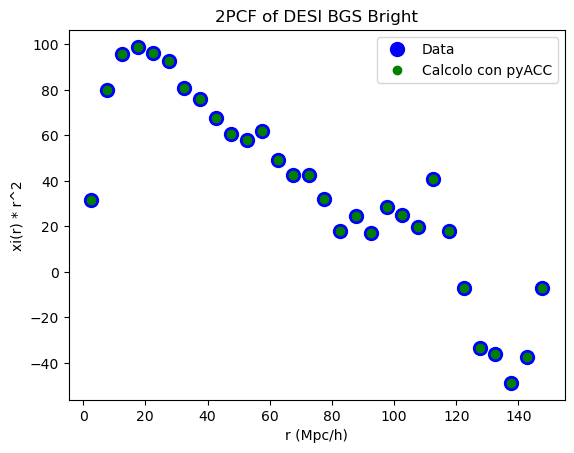

In [17]:
plt.plot(r_centers, r_centers**2*my_xi, 'o', color='blue', label='Data', markersize=10)
plt.plot(r_centers_class, r_centers_class**2 * xi_class, 'o', color='green', label='Calcolo con pyACC')
plt.xlabel('r (Mpc/h)')
plt.ylabel('xi(r) * r^2')
plt.title('2PCF of DESI BGS Bright')
plt.legend()
plt.show()